In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Query 1
germany = gpd.read_file("/home/paul/Datenbanken_Projekt/Deutsch-Karte/gadm41_DEU_1.shp")
unis_bundesland = pd.read_csv("/home/paul/Datenbanken_Projekt/Ergebnis-Queries/Query_1.csv")

# Query 2
germany_cities = gpd.read_file("/home/paul/Datenbanken_Projekt/Deutsch-Karte/gadm41_DEU_2.shp")
studis_stadt = pd.read_csv("/home/paul/Datenbanken_Projekt/Ergebnis-Queries/Query_2.csv")

#Query 3
uni_habilitation = pd.read_csv("/home/paul/Datenbanken_Projekt/Ergebnis-Queries/Query_3.csv")

#Query 4

uni_alter = pd.read_csv("/home/paul/Datenbanken_Projekt/Ergebnis-Queries/Query_4.csv")

# Query 5

uni_500k = pd.read_csv("/home/paul/Datenbanken_Projekt/Ergebnis-Queries/Query_5.csv")


<Axes: title={'center': 'Bundesländer nach Unis Anzahl'}>

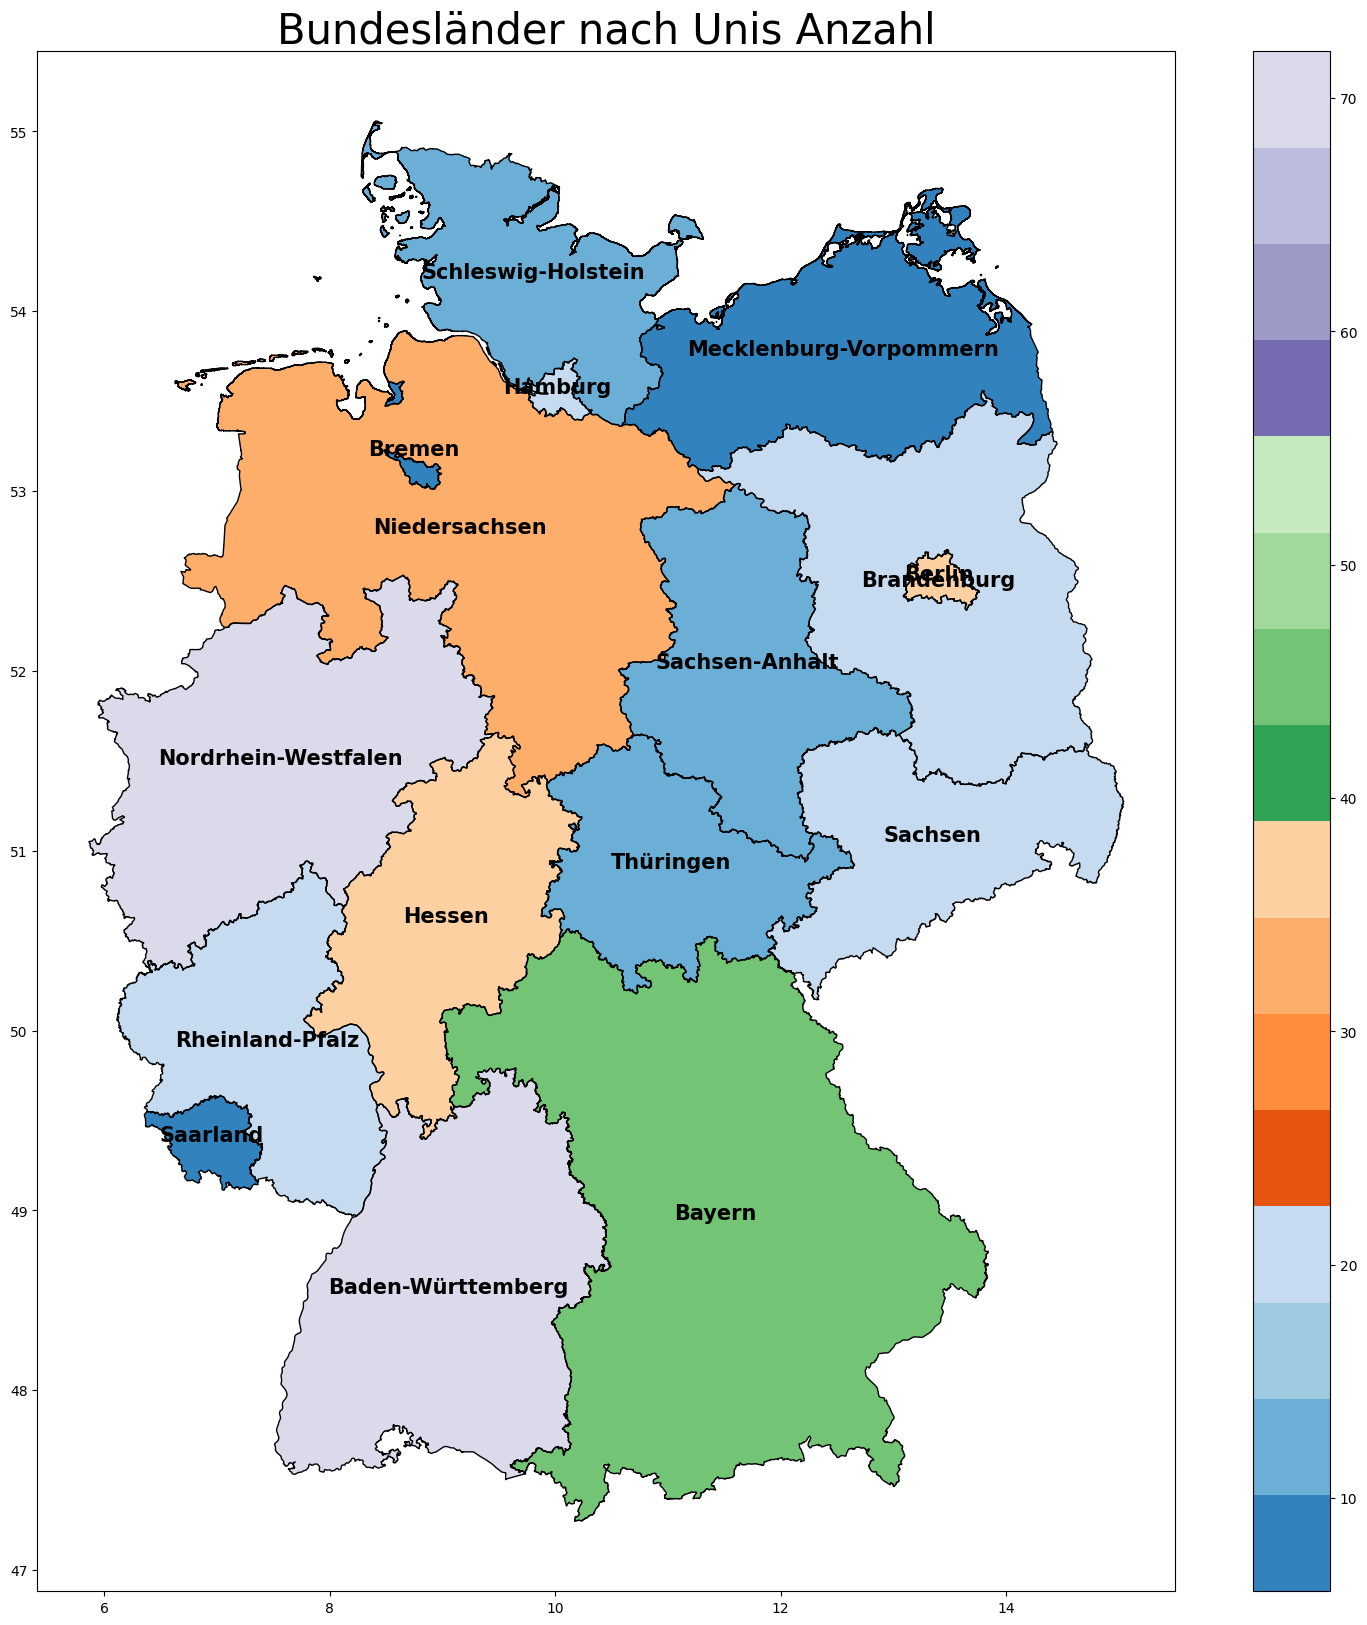

In [2]:
germany_merged = germany.merge(unis_bundesland, left_on='NAME_1', right_on='NAME_1', how='left')
germany_merged['marked'] = germany_merged['NAME_1'].notnull()
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Abgrenzung der Bundesländer
germany_merged.boundary.plot(ax=ax, linewidth=1, color='black')

# hier ordnen wir jeder Farbe einen unique Wert zu, sodass wir möglichst wenig Farbdoppelungen haben
unique_values = germany_merged['NAME_1'].unique()
cmap = ListedColormap(plt.cm.tab20c.colors[:len(unique_values)])

for idx, row in germany_merged.iterrows():
    plt.text(s=row['NAME_1'], x=row.geometry.centroid.x, y=row.geometry.centroid.y,
             horizontalalignment='center', fontsize=15, color='black', weight='bold')


plt.title("Bundesländer nach Unis Anzahl",fontsize=30)
germany_merged.plot(column='Unis', cmap=cmap, legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

<Axes: title={'center': '15 Städte mit meisten Studis'}>

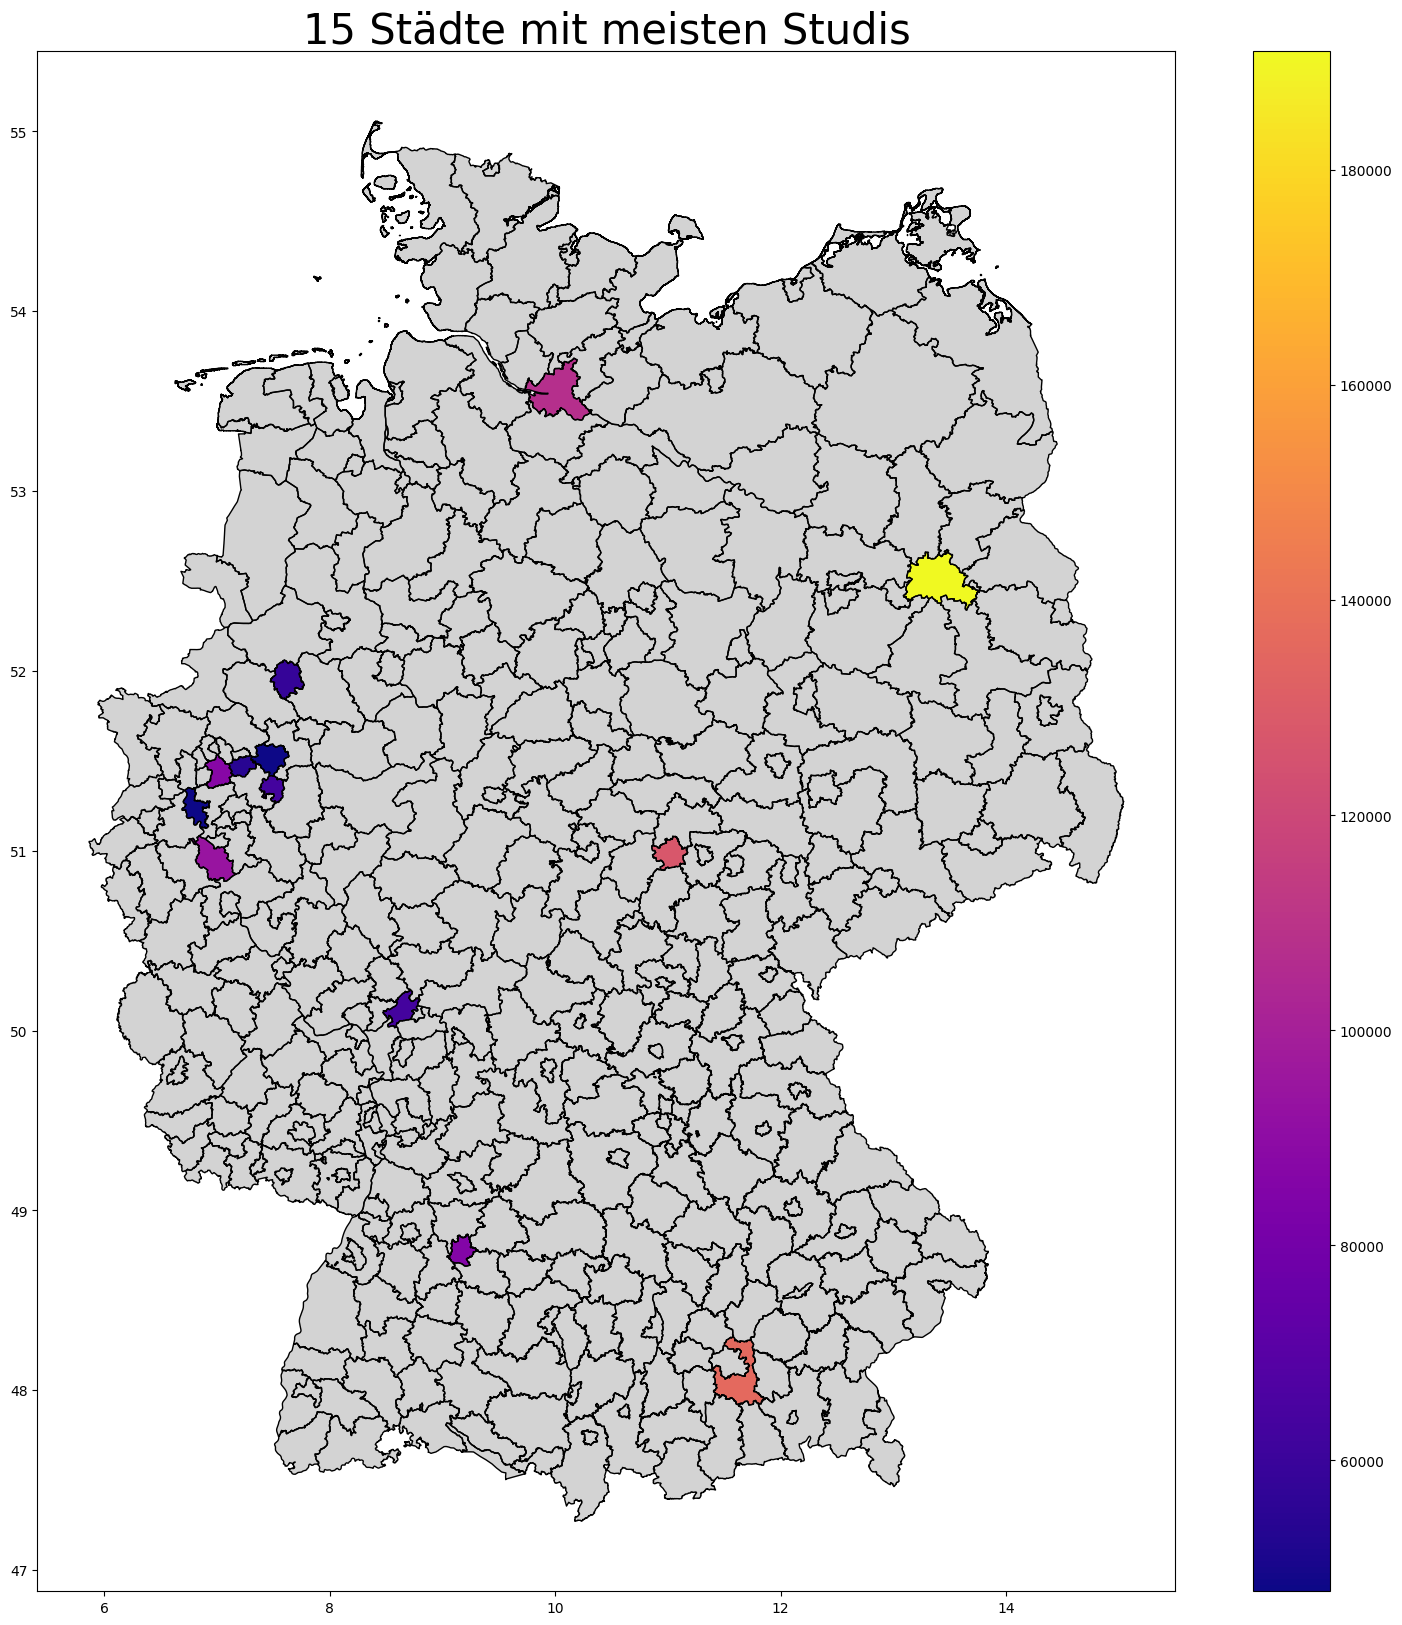

In [3]:
germany_cities_merged = germany_cities.merge(studis_stadt, left_on='NAME_2', right_on='NAME_1', how='left')
germany_cities_merged['marked'] = germany_cities_merged['NAME_2'].notnull()


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
germany_cities_merged.boundary.plot(ax=ax, linewidth=1, color='black')
cmap = plt.cm.plasma  # Wähle eine Farbkodierung (z.B. viridis, plasma, inferno, etc.)


plt.title("15 Städte mit meisten Studis", fontsize=30)
germany_cities_merged.plot(column='studis', cmap=cmap, legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

<Axes: title={'center': 'Unis mit Habilitationsrecht und dazugehörige Städte'}>

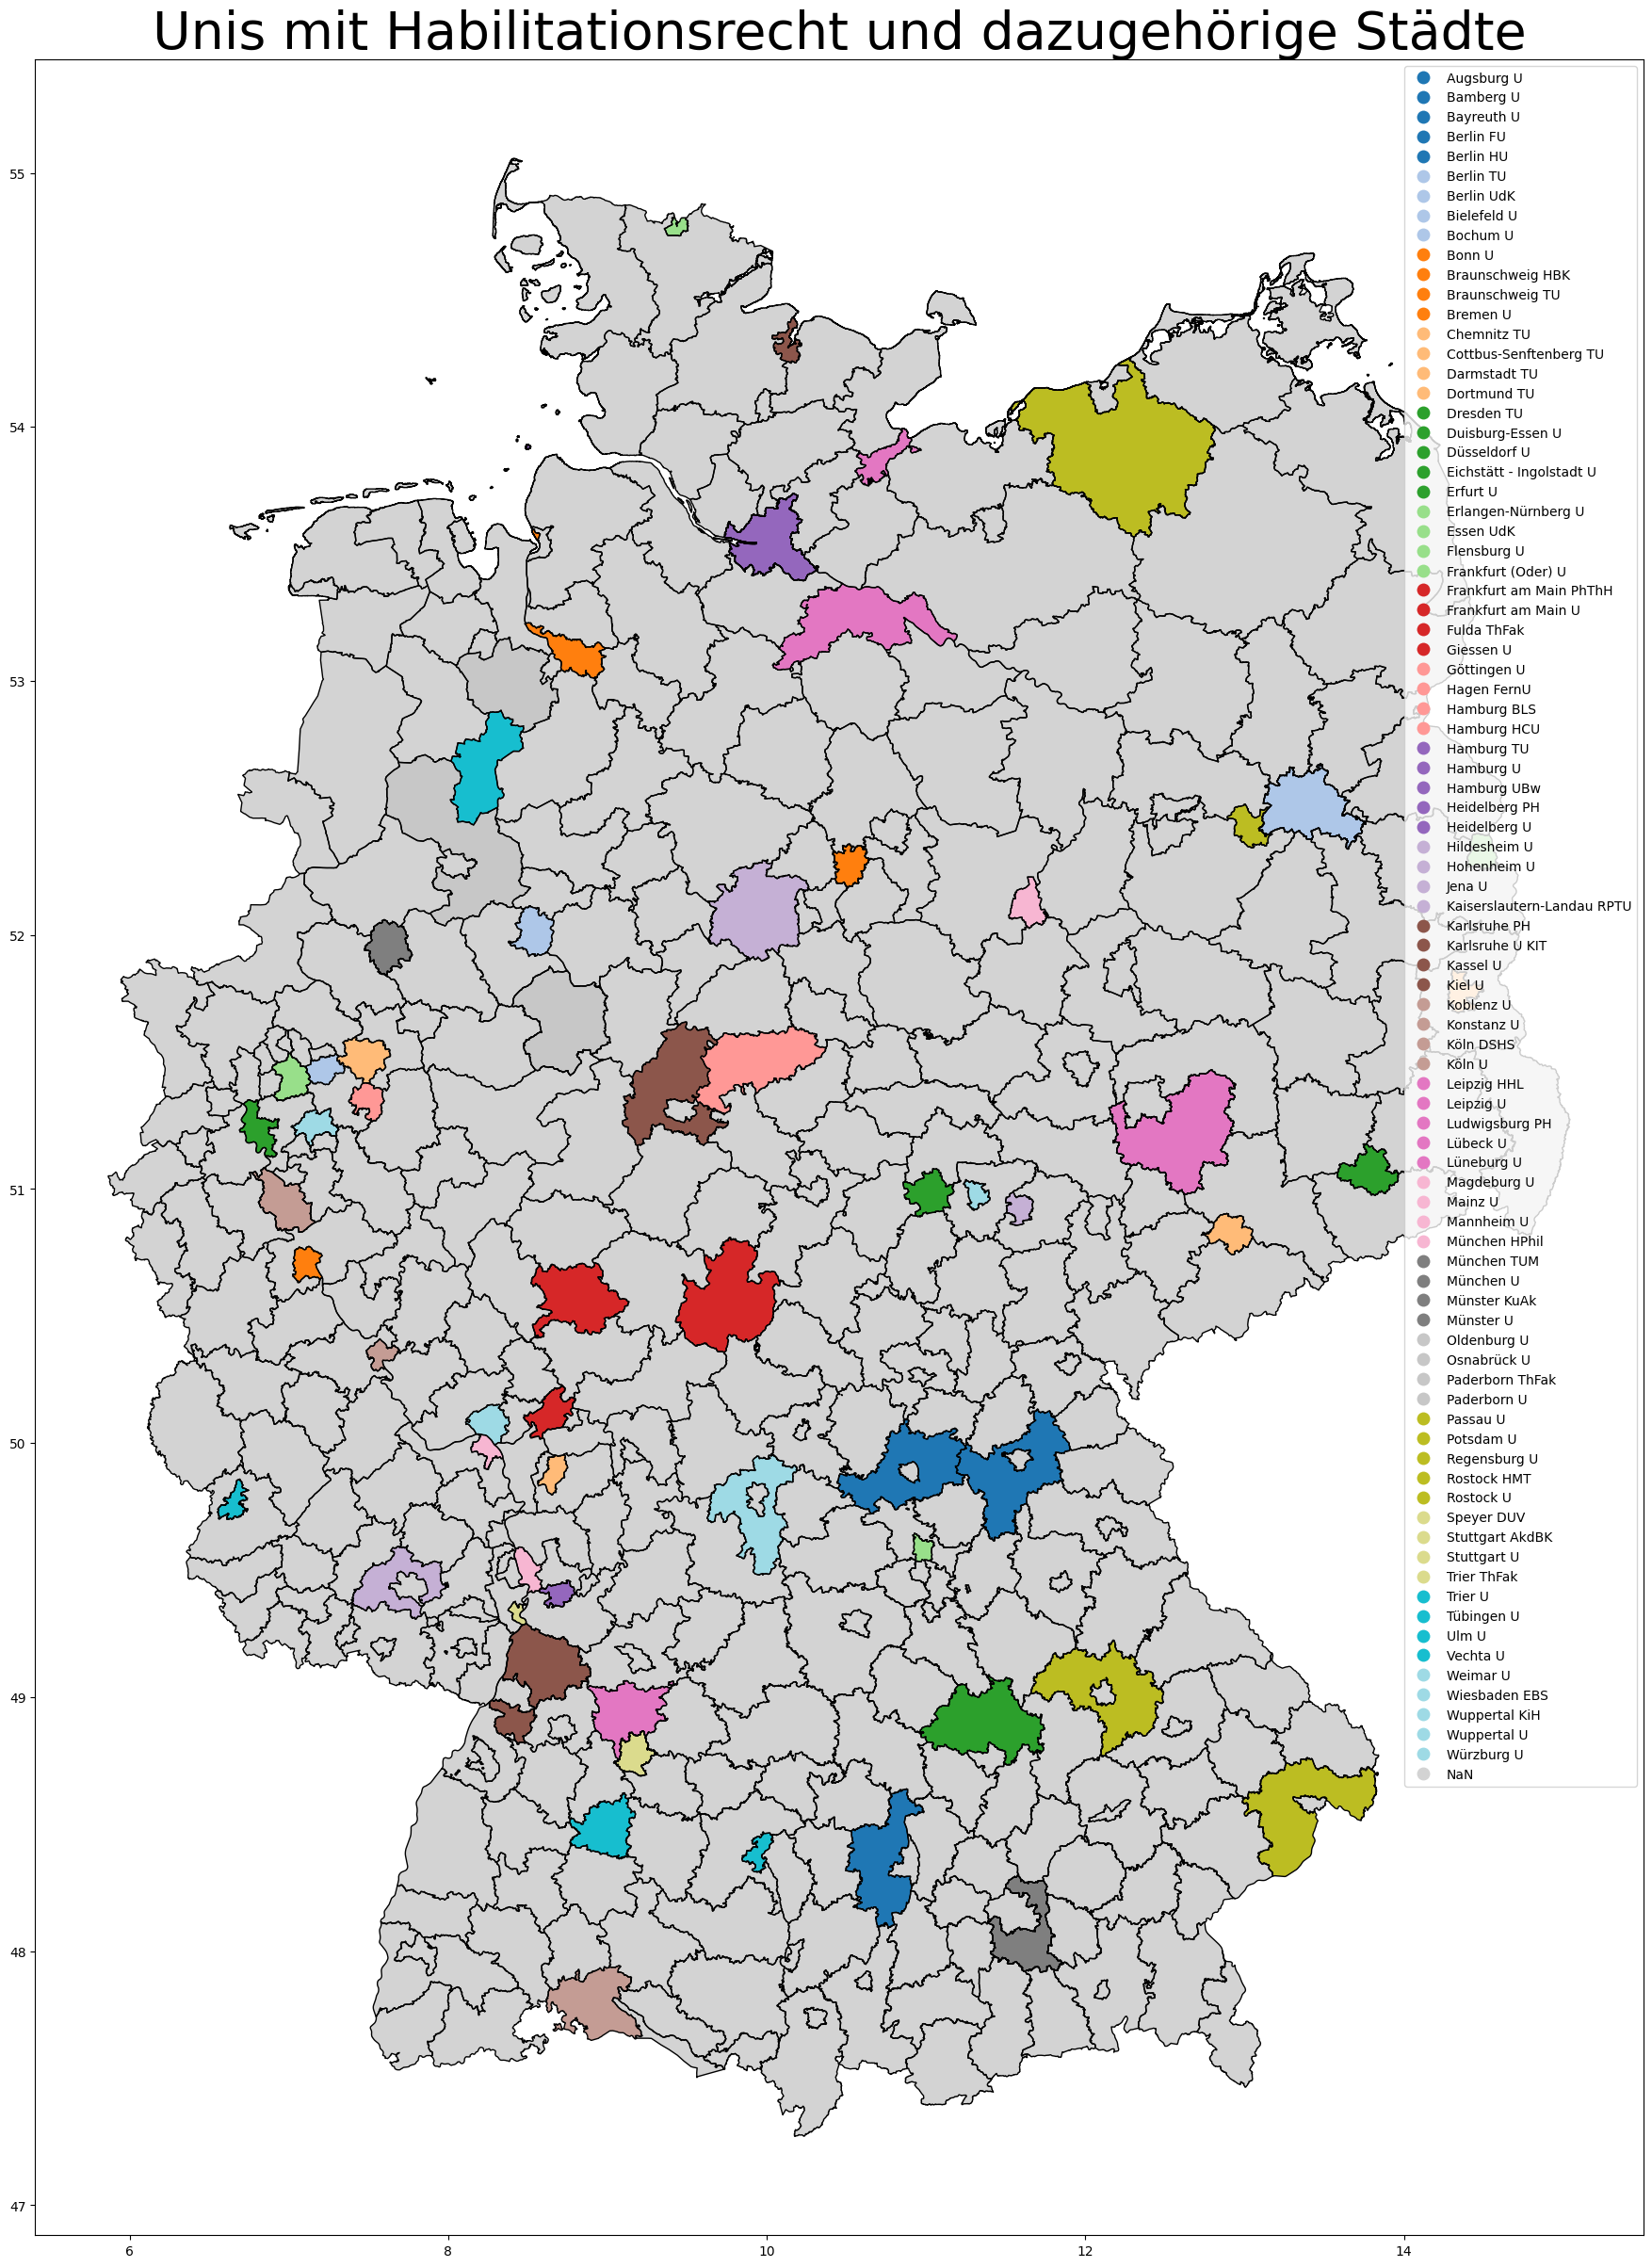

In [4]:
germany_cities_merged = germany_cities.merge(uni_habilitation, left_on='NAME_2', right_on='NAME_1', how='left')
germany_cities_merged['marked'] = germany_cities_merged['NAME_2'].notnull()
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
germany_cities_merged.boundary.plot(ax=ax, linewidth=1, color='black')

# hier ordnen wir jeder Frabe einen unique Wert zu, sodass wir möglichst wenig Farbdoppelungen haben
unique_values = germany_cities_merged['NAME_2'].unique()
cmap = ListedColormap(plt.cm.tab20.colors[:len(unique_values)])

plt.title("Unis mit Habilitationsrecht und dazugehörige Städte", fontsize=40)
germany_cities_merged.plot(column='Hochschul_Name',cmap = cmap, legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

<Axes: title={'center': 'Durchschnittsalter der Hochschulen pro Bundesland'}>

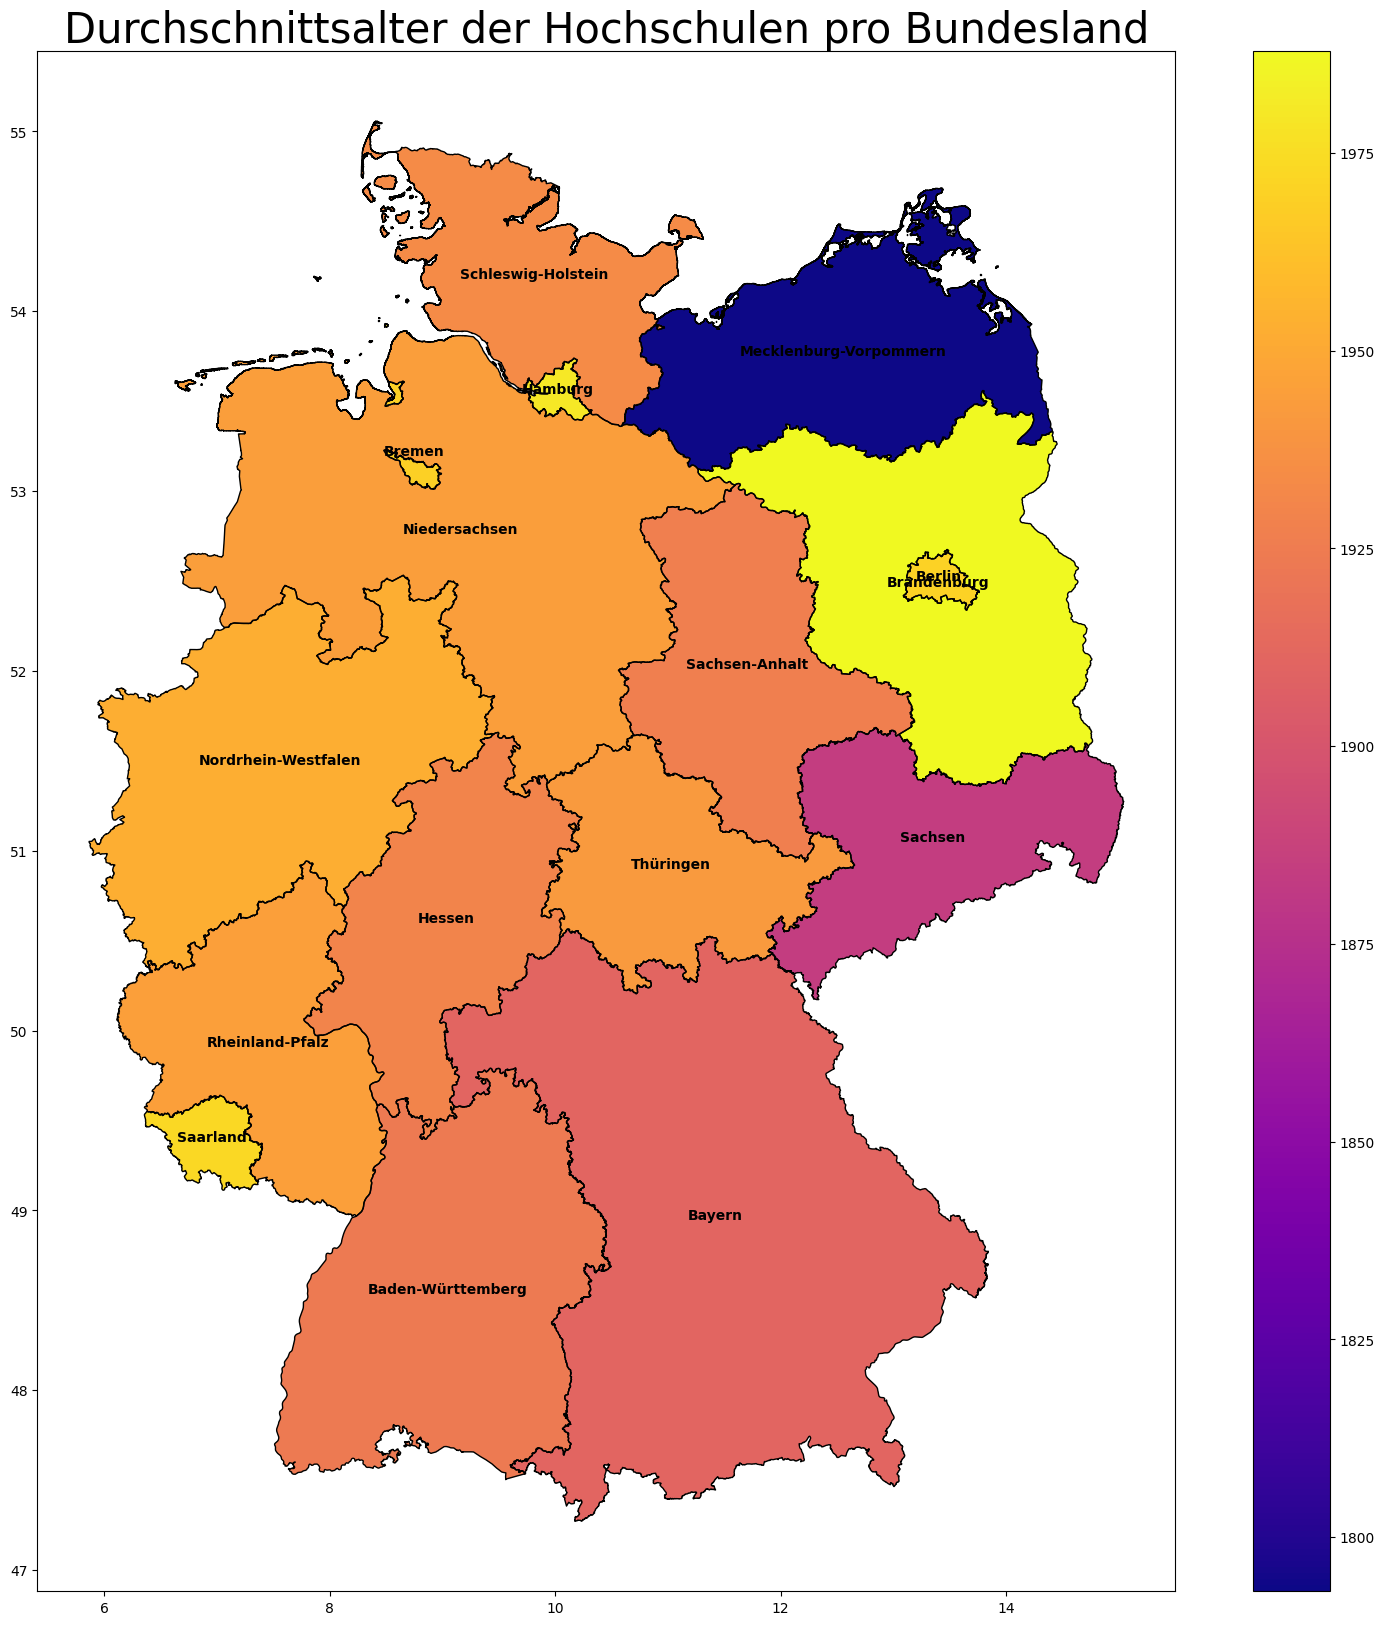

In [5]:
germany_merged = germany.merge(uni_alter, left_on='NAME_1', right_on='NAME_1', how='left')
germany_merged['marked'] = germany_merged['NAME_1'].notnull()
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
germany_merged.boundary.plot(ax=ax, linewidth=1, color='black')


germany_merged[germany_merged['marked']].plot(ax=ax, color='green')
cmap = plt.cm.plasma  # Wähle eine Farbkodierung (z.B. viridis, plasma, inferno, etc.)

for idx, row in germany_merged.iterrows():
    plt.text(s=row['NAME_1'], x=row.geometry.centroid.x, y=row.geometry.centroid.y,
             horizontalalignment='center', fontsize= 10, color='black', weight='bold')


plt.title("Durchschnittsalter der Hochschulen pro Bundesland",fontsize=30)
germany_merged.plot(column='DurchschnittsAlter', cmap=cmap, legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

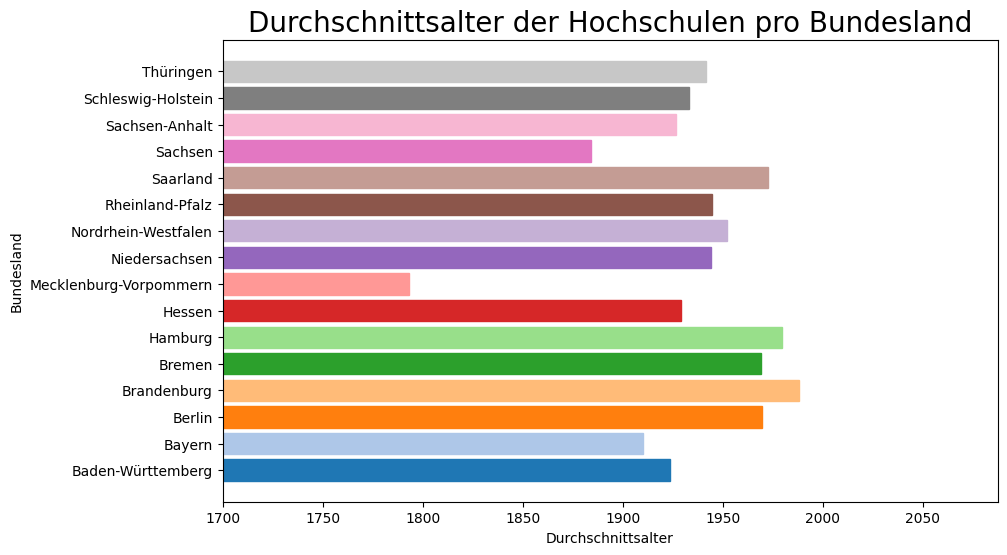

In [6]:
# zum späteren konvertieren in farbwerte
from matplotlib.colors import to_hex

germany_merged = germany.merge(uni_alter, left_on='NAME_1', right_on='NAME_1', how='left')

# jeder farbwert soll später unique sein => einfügen von 
unique_colors = germany_merged['NAME_1'].unique()

# Farbkodierung verwenden
cmap = ListedColormap(plt.cm.tab20.colors[:len(unique_colors)])

#  farbspalte einfügen damit jedes Land eine eigene Farbe erhält
germany_merged['color_index'] = germany_merged['NAME_1'].apply(lambda x: list(unique_colors).index(x))
germany_merged['farbe'] = germany_merged['color_index'].apply(lambda x: to_hex(cmap(x)))

plt.figure(figsize=(10, 6))
bars = plt.barh(germany_merged['NAME_1'], germany_merged['DurchschnittsAlter'], color=germany_merged['farbe'])

# Hinzufügen von Beschriftungen
plt.xlabel('Durchschnittsalter')
plt.ylabel('Bundesland')
plt.title('Durchschnittsalter der Hochschulen pro Bundesland', fontsize=20)

# starte ab 1700, damit sich die Tabelle nicht zu sehr zieht
plt.xlim(left=1700)

# Anzeigen der Farbbalken mit ihren Namen
for bar, color in zip(bars, germany_merged['farbe']):
    bar.set_color(color)

<Axes: title={'center': 'Alle Unis in Städten mit mehr als 500.000 Einwohnern'}>

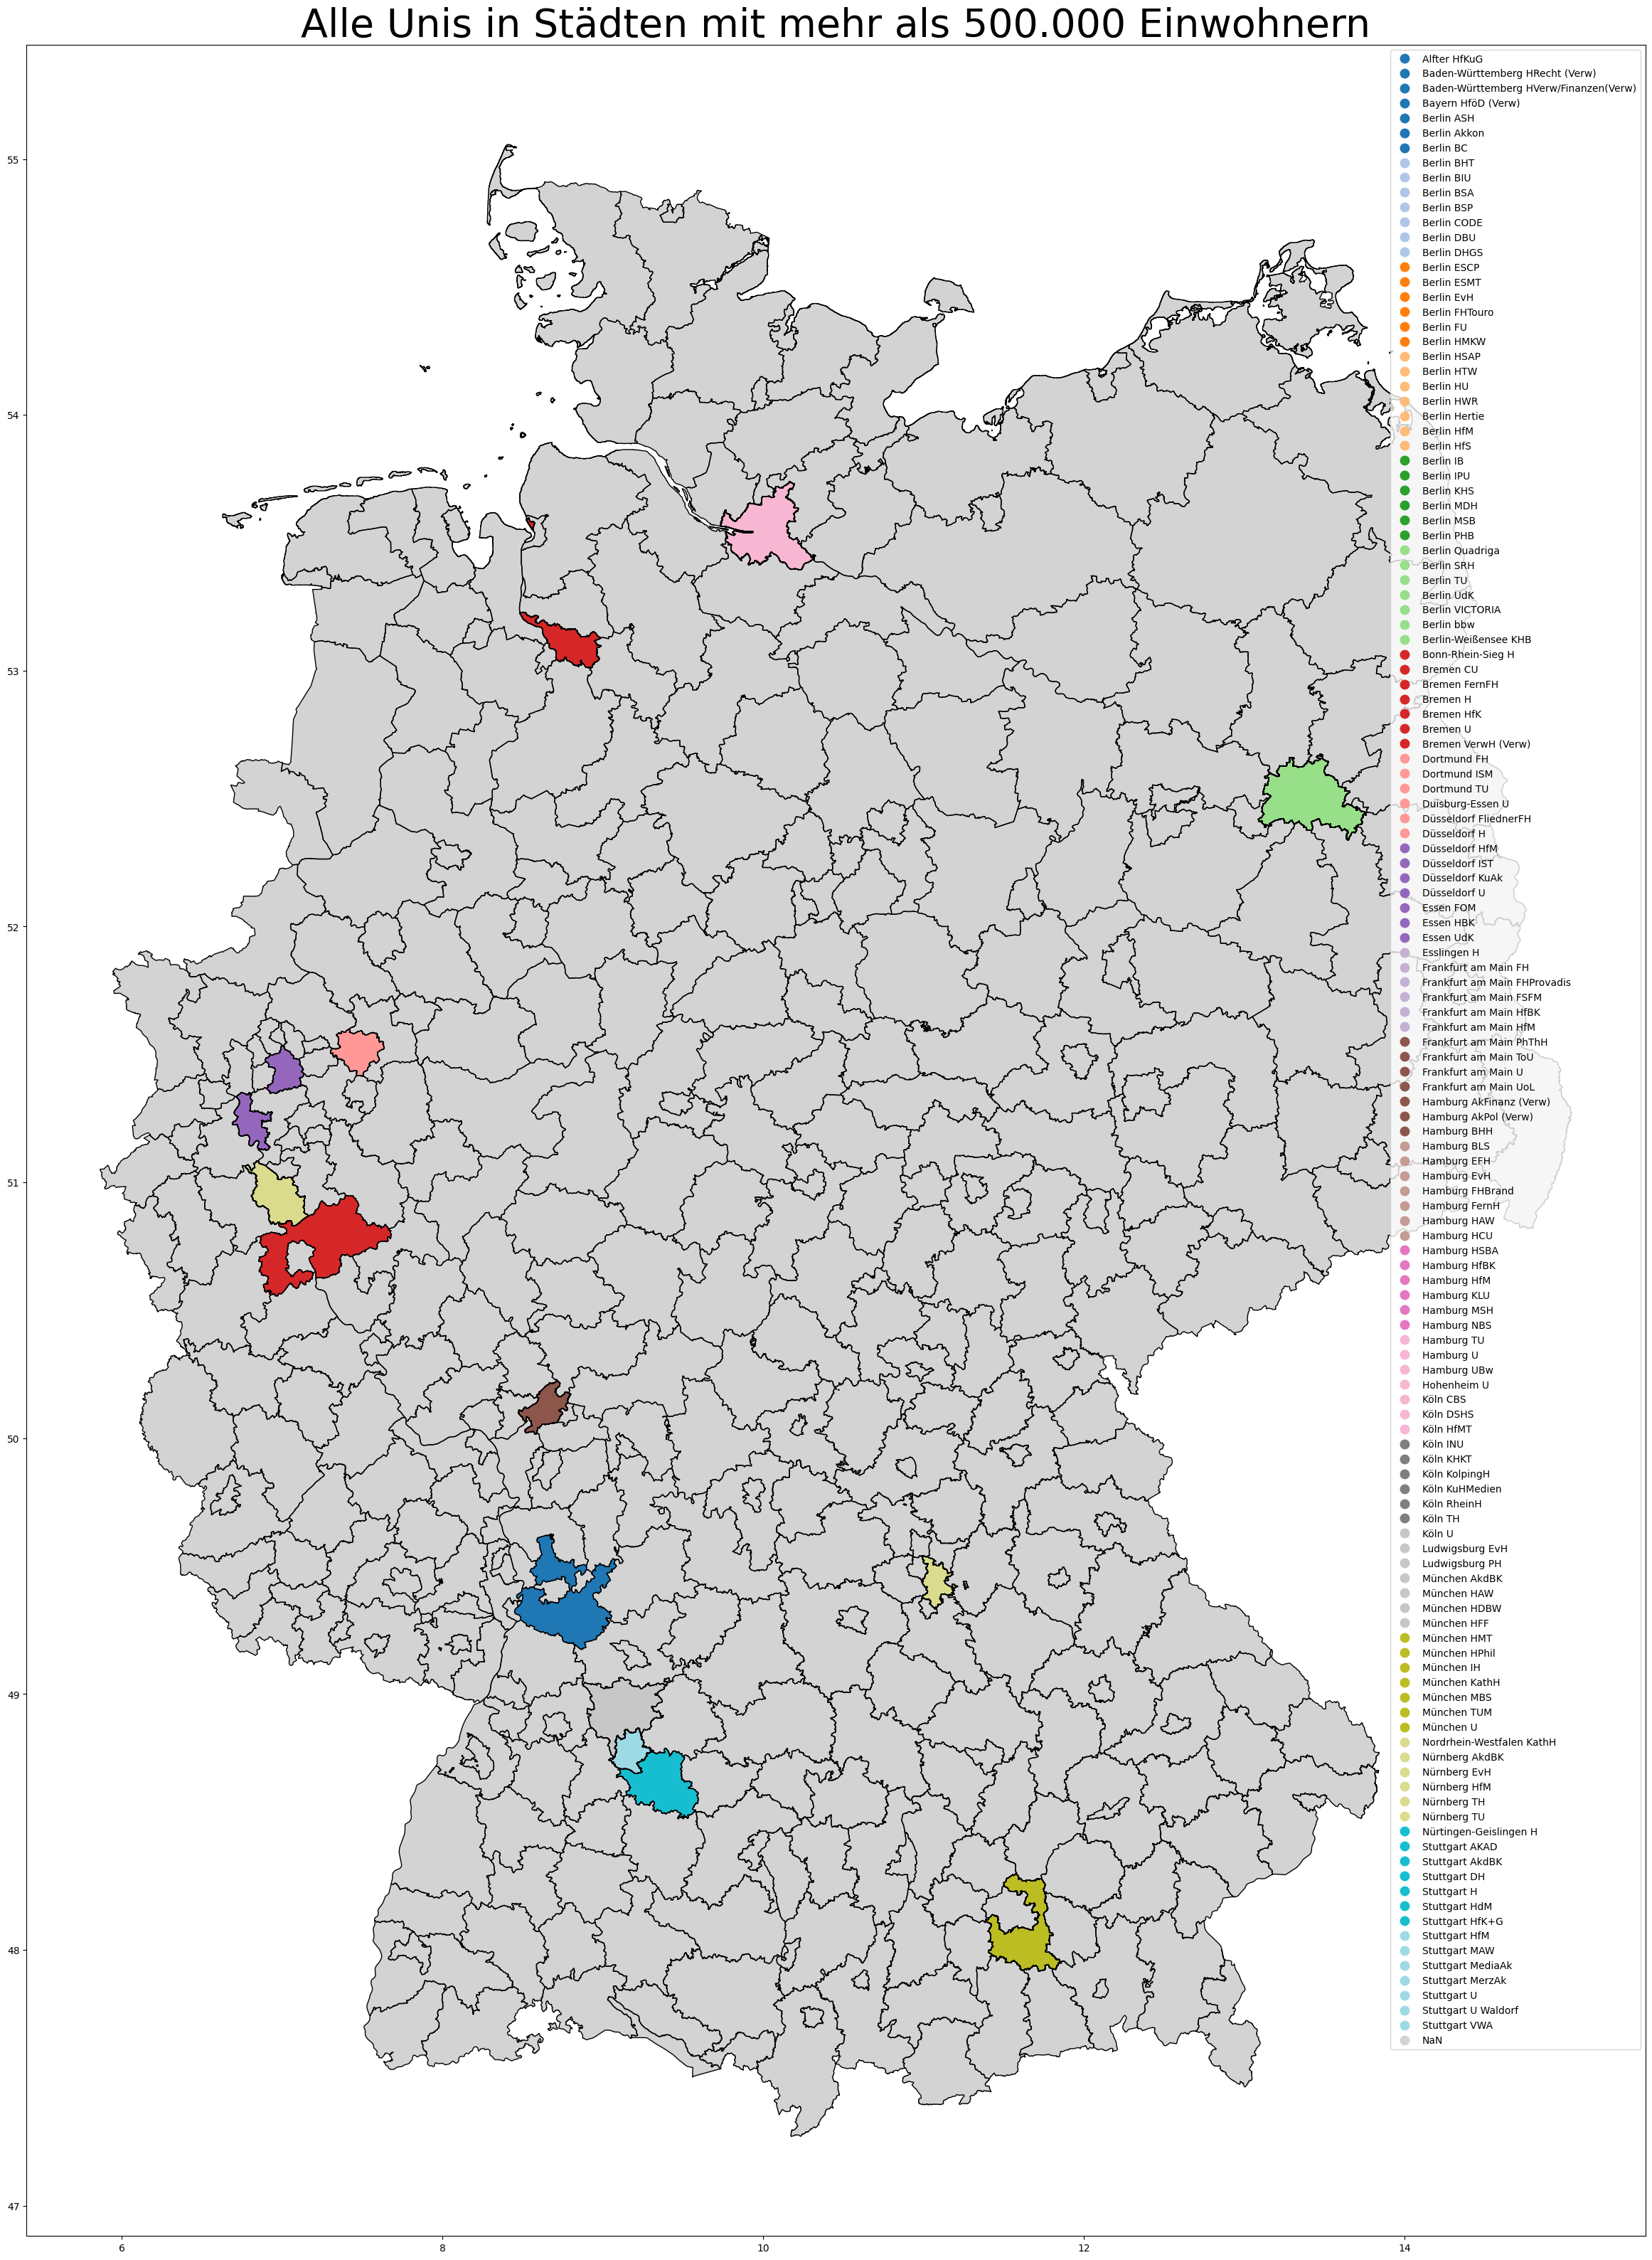

In [7]:
germany_cities_merged = germany_cities.merge(uni_500k, left_on='NAME_2', right_on='NAME_1', how='left')
germany_cities_merged['marked'] = germany_cities_merged['NAME_2'].notnull()


fig, ax = plt.subplots(1, 1, figsize=(30, 40))
germany_cities_merged.boundary.plot(ax=ax, linewidth=1, color='black')
cmap = plt.cm.tab20  # Wähle eine Farbkodierung (z.B. viridis, plasma, inferno, etc.)


plt.title("Alle Unis in Städten mit mehr als 500.000 Einwohnern", fontsize=40)
germany_cities_merged.plot(column='HochschulName', cmap=cmap, legend=True, ax=ax, missing_kwds={"color": "lightgrey"})
